## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

In [2]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
combined_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [8]:
# Generate a summary statistics table consisting of the mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each drug regimen.

drug_stats = combined_data_df.groupby('Drug Regimen')

drug_mean = drug_stats['Tumor Volume (mm3)'].mean()
drug_median = drug_stats['Tumor Volume (mm3)'].median()
drug_var = drug_stats['Tumor Volume (mm3)'].var()
drug_std = drug_stats['Tumor Volume (mm3)'].std()
drug_sem = drug_stats['Tumor Volume (mm3)'].sem()

drug_stats = pd.DataFrame({"mean": drug_mean,
                           "median": drug_median,
                           "variance": drug_var,
                           "std": drug_std,
                           "SEM": drug_sem})
drug_stats

,mean,median,variance,std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

Bar Plot Using PANDAS

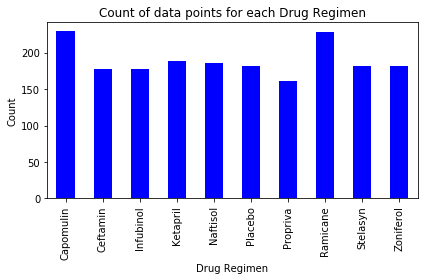

In [95]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
drug_group = combined_data_df.groupby('Drug Regimen')

drug_count = pd.DataFrame(drug_group['Drug Regimen'].count())

count_chart = drug_count.plot(kind='bar', color="blue", legend=None)

# Set a title & axis labels for the chart
count_chart.set_title("Count of data points for each Drug Regimen")
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Count")

plt.tight_layout()
plt.savefig("figures/PandaBarChart.png")
plt.show()

Bar Plot using Matplotlib

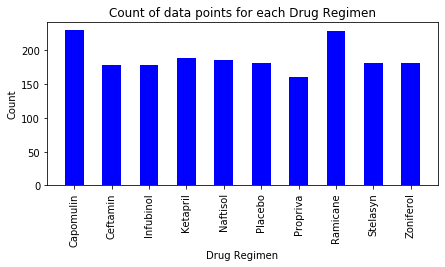

In [96]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

x_axis = np.arange(len(drug_count))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(7,3))
plt.bar(x_axis, drug_count["Drug Regimen"], color="blue", align="center", width=0.5)
plt.xticks(tick_locations, list(drug_count.index), rotation="vertical")
                           
plt.title("Count of data points for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

plt.savefig("figures/PyplotBarChart.png")
plt.show()

## Pie plots

Pie Plot using PANDAS

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_data = combined_data_df.groupby('Sex')

# create a DataFrame
gender_data_count = pd.DataFrame(gender_data['Sex'].count())
gender_data_count

,Sex
Sex,
Female,935
Male,958


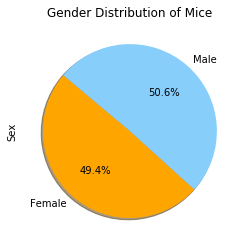

In [94]:
fig, ax = plt.subplots()

gender_data_count.plot(kind='pie', y='Sex', colors=["orange", "lightskyblue"], autopct='%1.1f%%',shadow=True, startangle=140, legend=False, ax=ax)

ax.set_ylabel('Sex')
ax.set_title("Gender Distribution of Mice")
plt.savefig("figures/PandaPieChart.png")

Pie Plot using Matplotlib

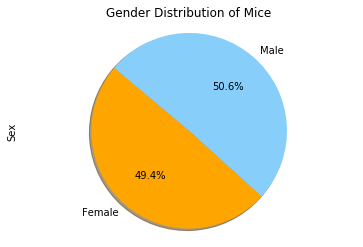

In [93]:
# Generate a pie plot showing the distribution of female versus male mice using matplotlib
genders = list(gender_data_count.index.values)

# The values of each section of the pie chart
counts = gender_data_count['Sex']

# The colors of each section of the pie chart
colors = ["orange", "lightskyblue"]

plt.pie(counts, labels=genders, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Gender Distribution of Mice")
plt.ylabel("Sex")
plt.axis("equal")
plt.savefig("figures/PyplotPieChart.png")
plt.show()

## Quartiles, outliers and boxplots

Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens

In [52]:
# # Create a list of the four drugs
# drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# # Filter the data using .isin to filter the four drugs
# drug_list_df = combined_data_df[combined_data_df['Drug Regimen'].isin(drug_list)]
# drug_list_df

In [54]:
# Find the maxs of each column based off Mouse ID
mouse_max = combined_data_df.groupby(['Mouse ID']).max()
mouse_max = mouse_max.reset_index()
mouse_max

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z578,Ramicane,Male,11,16,45,45.000000,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [24]:
# Merge dfs on Mouse ID and Timepoint
newdf = mouse_max[['Mouse ID', 'Timepoint']].merge(combined_data_df, on=['Mouse ID', 'Timepoint'])
newdf

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [25]:
# Filter by each drug regimen based on max Tumor Volume
cap_df = newdf.loc[newdf['Drug Regimen']=="Capomulin"]['Tumor Volume (mm3)']
cap_df

19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
81     47.685963
84     37.311846
86     38.125164
88     38.753265
109    41.483008
116    38.846876
122    28.430964
125    33.329098
163    46.539206
164    32.377357
170    41.581521
175    23.343598
181    40.728578
184    34.455298
193    31.023923
205    40.658124
209    39.952347
221    36.041047
227    28.484033
240    31.896238
Name: Tumor Volume (mm3), dtype: float64

In [26]:
ram_df = newdf.loc[newdf['Drug Regimen']=="Ramicane"]['Tumor Volume (mm3)']
ram_df

6      38.407618
7      43.047543
10     38.810366
12     32.978522
33     38.342008
37     33.397653
45     37.311236
52     40.659006
70     29.128472
77     33.562402
78     36.374510
92     31.560470
94     36.134852
97     22.050126
120    30.564625
127    31.095335
158    45.220869
159    36.561652
167    37.225650
169    43.419381
178    30.276232
191    40.667713
218    43.166373
236    44.183451
245    30.638696
Name: Tumor Volume (mm3), dtype: float64

In [27]:
inf_df = newdf.loc[newdf['Drug Regimen']=="Infubinol"]['Tumor Volume (mm3)']
inf_df

0      67.973419
1      65.525743
11     57.031862
13     66.083066
27     72.226731
31     36.321346
41     60.969711
50     62.435404
56     60.918767
79     67.289621
98     66.196912
102    62.117279
124    47.010364
130    60.165180
142    55.629428
143    45.699331
154    54.656549
171    55.650681
198    46.250112
201    54.048608
203    51.542431
212    50.005138
217    58.268442
234    67.685569
246    62.754451
Name: Tumor Volume (mm3), dtype: float64

In [29]:
cef_df = newdf.loc[newdf['Drug Regimen']=="Ceftamin"]['Tumor Volume (mm3)']
cef_df

3      62.999356
21     45.000000
22     56.057749
25     55.742829
58     48.722078
76     47.784682
89     61.849023
95     68.923185
107    67.748662
108    57.918381
110    46.784535
111    59.851956
114    64.299830
135    59.741901
151    61.433892
155    64.192341
185    45.000000
189    52.925348
190    45.000000
210    67.527482
224    45.000000
229    64.634949
232    61.386660
239    68.594745
241    64.729837
Name: Tumor Volume (mm3), dtype: float64

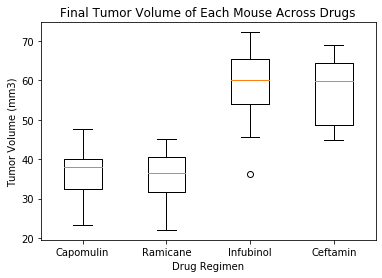

In [124]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot([cap_df, ram_df, inf_df, cef_df])
plt.title("Final Tumor Volume of Each Mouse Across Drugs")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel('Drug Regimen')
plt.xticks([1,2,3,4],('Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'))

# Save the figure
plt.savefig("figures/BoxWhiskerPlot.png")

plt.show()

In [64]:
# Calculate the IQR and quantitatively determine if there are any potential outliers for each drug.
# Capomulin
cap_quartiles = cap_df.quantile([.25,.5,.75]).round(2)
cap_lowerq = cap_quartiles[0.25].round(2)
cap_upperq = cap_quartiles[0.75].round(2)
cap_iqr = round(cap_upperq-cap_lowerq,2)
cap_lower_bound = round(cap_lowerq - (1.5*cap_iqr),2)
cap_upper_bound = round(cap_upperq + (1.5*cap_iqr),2)

print(f"The lower quartile of tumor volume is: {cap_lowerq}")
print(f"The upper quartile of tumor volume is: {cap_upperq}")
print(f"The interquartile range of tumor volume is: {cap_iqr}")
print(f"The the median of tumor volume is: {cap_quartiles[0.5]} ")
print(f"Values below {cap_lower_bound} could be outliers.")
print(f"Values above {cap_upper_bound} could be outliers.")

The lower quartile of tumor volume is: 32.38
The upper quartile of tumor volume is: 40.16
The interquartile range of tumor volume is: 7.78
The the median of tumor volume is: 38.13 
Values below 20.71 could be outliers.
Values above 51.83 could be outliers.


In [63]:
# Ramicane
ram_quartiles = ram_df.quantile([.25,.5,.75]).round(2)
ram_lowerq = ram_quartiles[0.25].round(2)
ram_upperq = ram_quartiles[0.75].round(2)
ram_iqr = round(ram_upperq-ram_lowerq,2)
ram_lower_bound = round(ram_lowerq - (1.5*ram_iqr),2)
ram_upper_bound = round(ram_upperq + (1.5*ram_iqr),2)

print(f"The lower quartile of tumor volume is: {ram_lowerq}")
print(f"The upper quartile of tumor volume is: {ram_upperq}")
print(f"The interquartile range of tumor volume is: {ram_iqr}")
print(f"The the median of tumor volume is: {ram_quartiles[0.5]} ")
print(f"Values below {ram_lower_bound} could be outliers.")
print(f"Values above {ram_upper_bound} could be outliers.")

The lower quartile of tumor volume is: 31.56
The upper quartile of tumor volume is: 40.66
The interquartile range of tumor volume is: 9.1
The the median of tumor volume is: 36.56 
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.


In [62]:
# Infubinol
inf_quartiles = inf_df.quantile([.25,.5,.75]).round(2)
inf_lowerq = inf_quartiles[0.25].round(2)
inf_upperq = inf_quartiles[0.75].round(2)
inf_iqr = round(inf_upperq-inf_lowerq,2)
inf_lower_bound = round(inf_lowerq - (1.5*inf_iqr),2)
inf_upper_bound = round(inf_upperq + (1.5*inf_iqr),2)

print(f"The lower quartile of tumor volume is: {inf_lowerq}")
print(f"The upper quartile of tumor volume is: {inf_upperq}")
print(f"The interquartile range of tumor volume is: {inf_iqr}")
print(f"The the median of tumor volume is: {inf_quartiles[0.5]} ")
print(f"Values below {inf_lower_bound} could be outliers.")
print(f"Values above {inf_upper_bound} could be outliers.")

The lower quartile of tumor volume is: 54.05
The upper quartile of tumor volume is: 65.53
The interquartile range of tumor volume is: 11.48
The the median of tumor volume is: 60.17 
Values below 36.83 could be outliers.
Values above 82.75 could be outliers.


In [61]:
# Ceftamin
cef_quartiles = cef_df.quantile([.25,.5,.75]).round(2)
cef_lowerq = cef_quartiles[0.25].round(2)
cef_upperq = cef_quartiles[0.75].round(2)
cef_iqr = round(cef_upperq-cef_lowerq,2)
cef_lower_bound = round(cef_lowerq - (1.5*cef_iqr),2)
cef_upper_bound = round(cef_upperq + (1.5*cef_iqr),2)

print(f"The lower quartile of tumor volume is: {cef_lowerq}")
print(f"The upper quartile of tumor volume is: {cef_upperq}")
print(f"The interquartile range of tumor volume is: {cef_iqr}")
print(f"The the median of tumor volume is: {cef_quartiles[0.5]} ")
print(f"Values below {cef_lower_bound} could be outliers.")
print(f"Values above {cef_upper_bound} could be outliers.")

The lower quartile of tumor volume is: 48.72
The upper quartile of tumor volume is: 64.3
The interquartile range of tumor volume is: 15.58
The the median of tumor volume is: 59.85 
Values below 25.35 could be outliers.
Values above 87.67 could be outliers.


## Line and scatter plots

In [36]:
# Capomulin dataframe
capomulin_data = combined_data_df.loc[combined_data_df['Drug Regimen'] == 'Capomulin']
capomulin_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [37]:
mouse_cap = capomulin_data.loc[capomulin_data['Mouse ID'] == "s185"]
mouse_cap

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


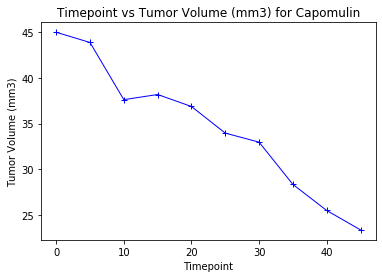

In [116]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
x_axis = mouse_cap["Timepoint"]
y_axis = mouse_cap["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis, marker="+",color="blue", linewidth=1, label="Tumor Volume")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Timepoint vs Tumor Volume (mm3) for Capomulin")

# Save the figure
plt.savefig("figures/LinePlot.png")

plt.show()

In [ ]:
# capomulin_data = combined_data_df.loc[combined_data_df['Drug Regimen'] == 'Capomulin']
# capomulin_data

In [40]:
capomulin_average = capomulin_data.groupby(['Mouse ID']).mean()
capomulin_average

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


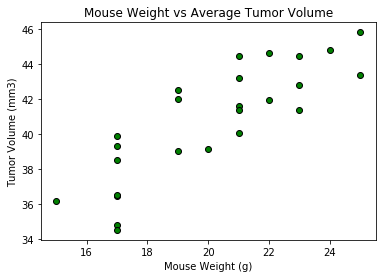

In [114]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.scatter(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"], facecolors='green', edgecolors='black')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Mouse Weight vs Average Tumor Volume")
plt.savefig("figures/ScatterPlot.png")
plt.show()

In [43]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
drug_corr = st.pearsonr(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])
drug_corr

(0.8419363424694717, 1.322572243471279e-07)

In [46]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])
slope, intercept, rvalue, pvalue, stderr


(0.9544396890241045,
 21.552160532685015,
 0.8419363424694718,
 1.3225722434712642e-07,
 0.1275435903320134)

The r-squared is: 0.8419363424694718


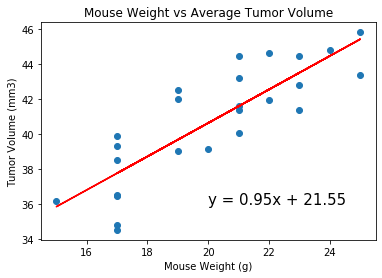

In [115]:
# Print out the r-squared value along with the plot.
x_values = capomulin_average['Weight (g)']
y_values = capomulin_average['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])
slope, intercept, rvalue, pvalue, stderr
reg_values = capomulin_average["Weight (g)"]*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, reg_values, "r-", color="red")
plt.annotate(line_eq,(20,36),fontsize=15,color="black")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue}")
plt.title("Mouse Weight vs Average Tumor Volume")

# Save the figure
plt.savefig("figures/ScatterLineChart.png")

plt.show()